In [5]:
#IMPORT DEPENDENCIES

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [33]:
(x_train , y_train),(x_test , y_test) = keras.datasets.mnist.load_data()

In [36]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [38]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [34]:
import matplotlib.pyplot as plt

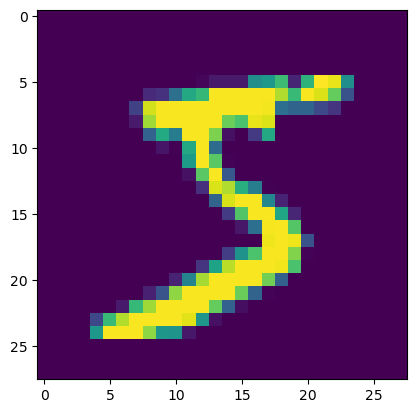

In [9]:
plt.imshow(x_train[0])

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#use loss function sparse categorical crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
#train the model
model.fit(x_train, y_train , epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5108 - loss: 1.8056 - val_accuracy: 0.8440 - val_loss: 0.6798
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8460 - loss: 0.6209 - val_accuracy: 0.8896 - val_loss: 0.4401
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8823 - loss: 0.4472 - val_accuracy: 0.8994 - val_loss: 0.3682
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8959 - loss: 0.3838 - val_accuracy: 0.9061 - val_loss: 0.3350
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8990 - loss: 0.3520 - val_accuracy: 0.9118 - val_loss: 0.3139
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9098 - loss: 0.3228 - val_accuracy: 0.9152 - val_loss: 0.3017
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9113 - loss: 0.3132 - val_accuracy: 0.9183 - val_loss: 0.2869
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9137 - loss: 0.3014 - 

In [20]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
#accuracy score
model.predict(x_test[56].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([4])

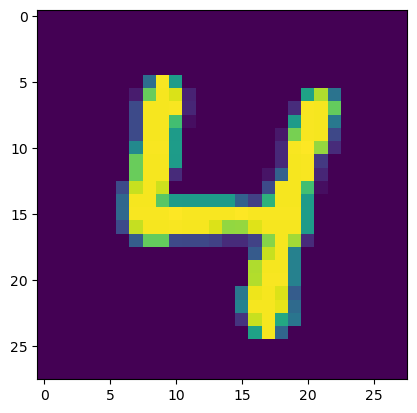

In [32]:
plt.imshow(x_test[56])